In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the data
df = pd.read_csv('ms_data_combined.csv')

# 1. Walking speed analysis:

## Scatter plot of age vs walking speed with regression line

<Figure size 1000x600 with 0 Axes>

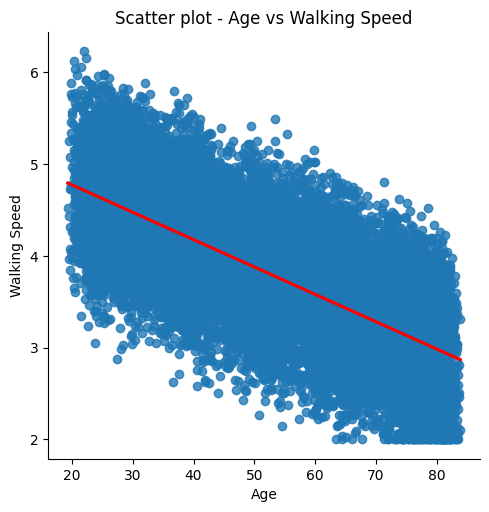

In [3]:
plt.figure(figsize=(10, 6))
sns.lmplot(x='age', y='walking_speed', data=df, aspect=1.0, line_kws={'color': 'red'})
plt.title('Scatter plot - Age vs Walking Speed')
plt.xlabel('Age')
plt.ylabel('Walking Speed')
plt.show()

## Box plots by education level

In [4]:
# Change the order of the educational level
education_order = ["High School", "Some College", "Bachelors", "Graduate"]
df['education_level'] = pd.Categorical(df['education_level'], categories=education_order, ordered=True)

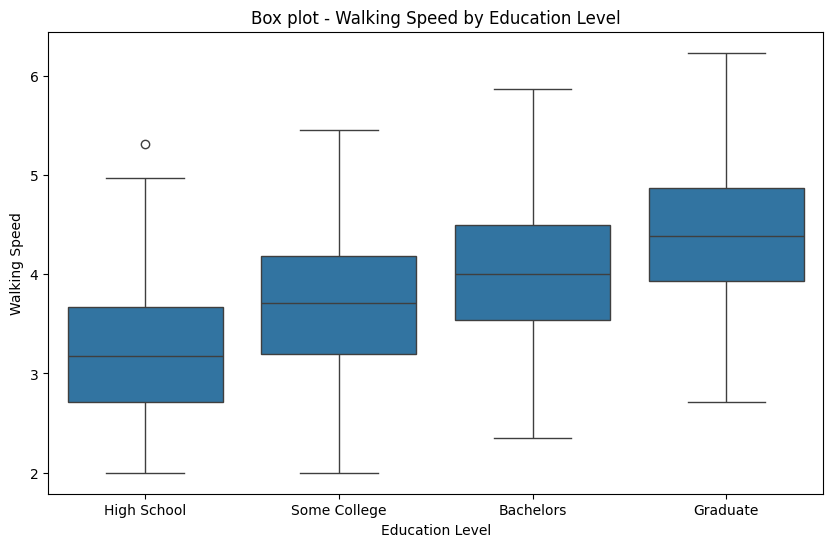

In [5]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='education_level', y='walking_speed', data=df)
plt.title('Box plot - Walking Speed by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Walking Speed')
plt.show()

## Line plot showing education age interaction

In [6]:
# Compute mean walking speed by age and education level
age_education = df.groupby(['age', 'education_level'])['walking_speed'].mean().reset_index()

C:\Users\ykatsuhara\AppData\Local\Temp\ipykernel_2732\2690502474.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_education = df.groupby(['age', 'education_level'])['walking_speed'].mean().reset_index()


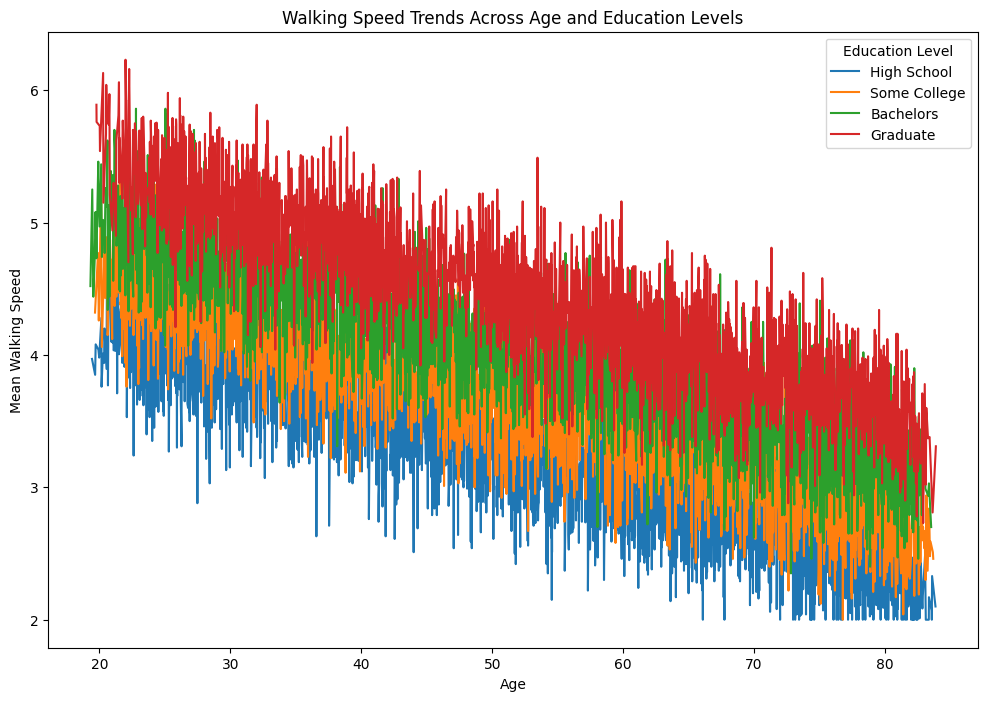

In [7]:
plt.figure(figsize=(12, 8))
sns.lineplot(x='age', y='walking_speed', hue='education_level', data=age_education)
plt.title('Walking Speed Trends Across Age and Education Levels')
plt.xlabel('Age')
plt.ylabel('Mean Walking Speed')
plt.legend(title='Education Level')
plt.show()

# Cost analysis:

## Bar plot of mean costs by insurance type with error bars

In [ ]:
# Sort by the insurance type for the visualization
df = df.sort_values('insurance_type')

C:\Users\ykatsuhara\AppData\Local\Temp\ipykernel_2732\926412952.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='insurance_type', y='visit_cost', data=df, ci='sd')


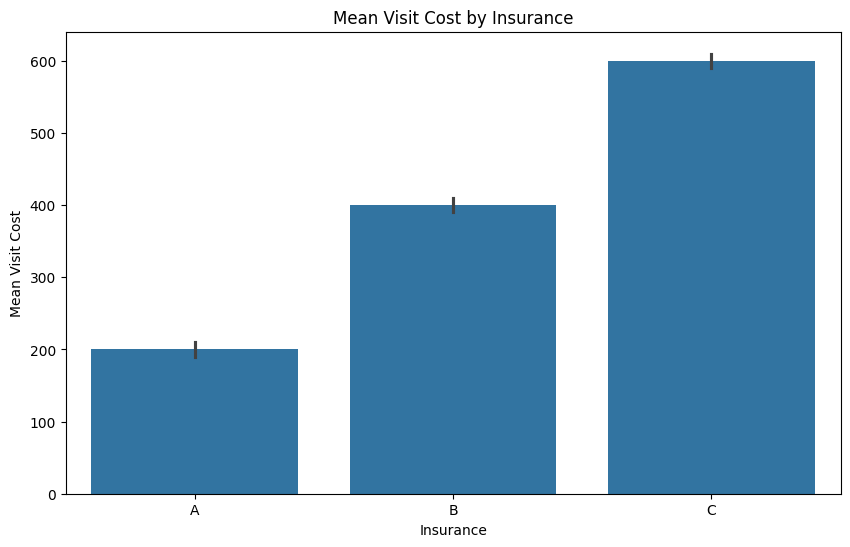

In [9]:
plt.figure(figsize=(10, 6))
sns.barplot(x='insurance_type', y='visit_cost', data=df, ci='sd')
plt.title('Mean Visit Cost by Insurance')
plt.xlabel('Insurance')
plt.ylabel('Mean Visit Cost')
plt.show()

## Box plots showing cost distributions

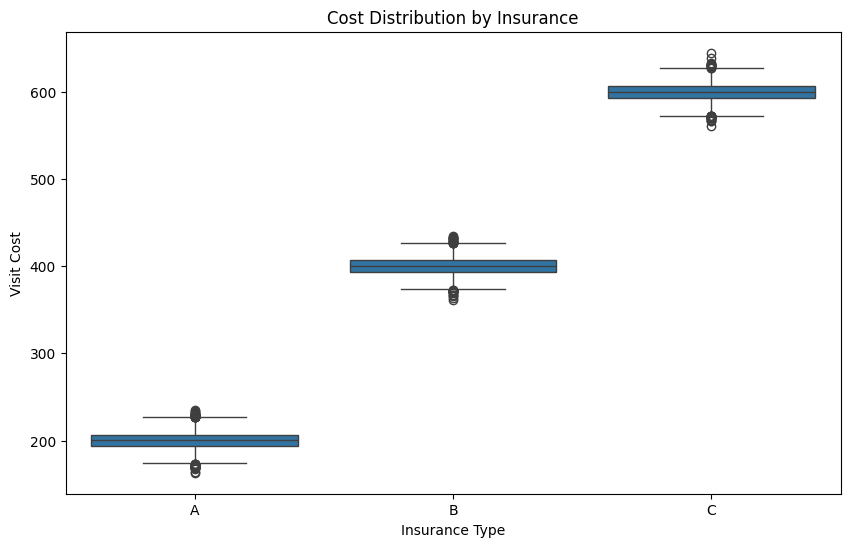

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='insurance_type', y='visit_cost', data=df)
plt.title('Cost Distribution by Insurance')
plt.xlabel('Insurance Type')
plt.ylabel('Visit Cost')
plt.show()

# Combined visualizations:

## Pair plot of key variables

In [11]:
# Shuffle the data to randomize the plotting order
df = df.sample(frac=1, random_state=42).reset_index(drop=True)


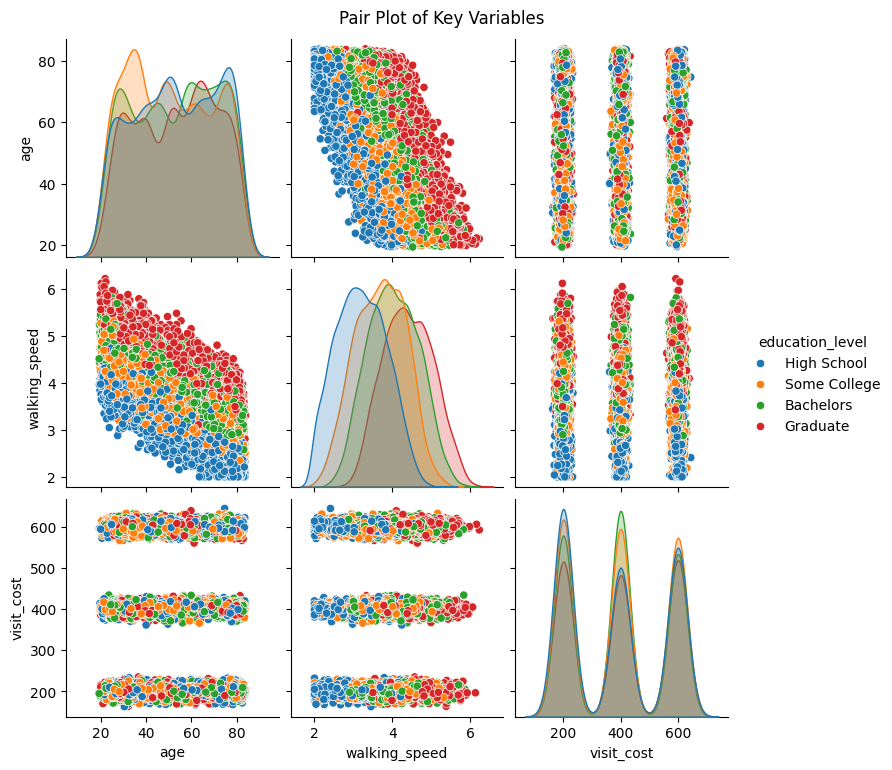

In [12]:
sns.pairplot(df[['age', 'walking_speed', 'visit_cost', 'education_level', 'insurance_type']], 
             hue='education_level', diag_kind='kde')
plt.suptitle('Pair Plot of Key Variables', y=1.02)
plt.show()

## Faceted plots by education/insurance

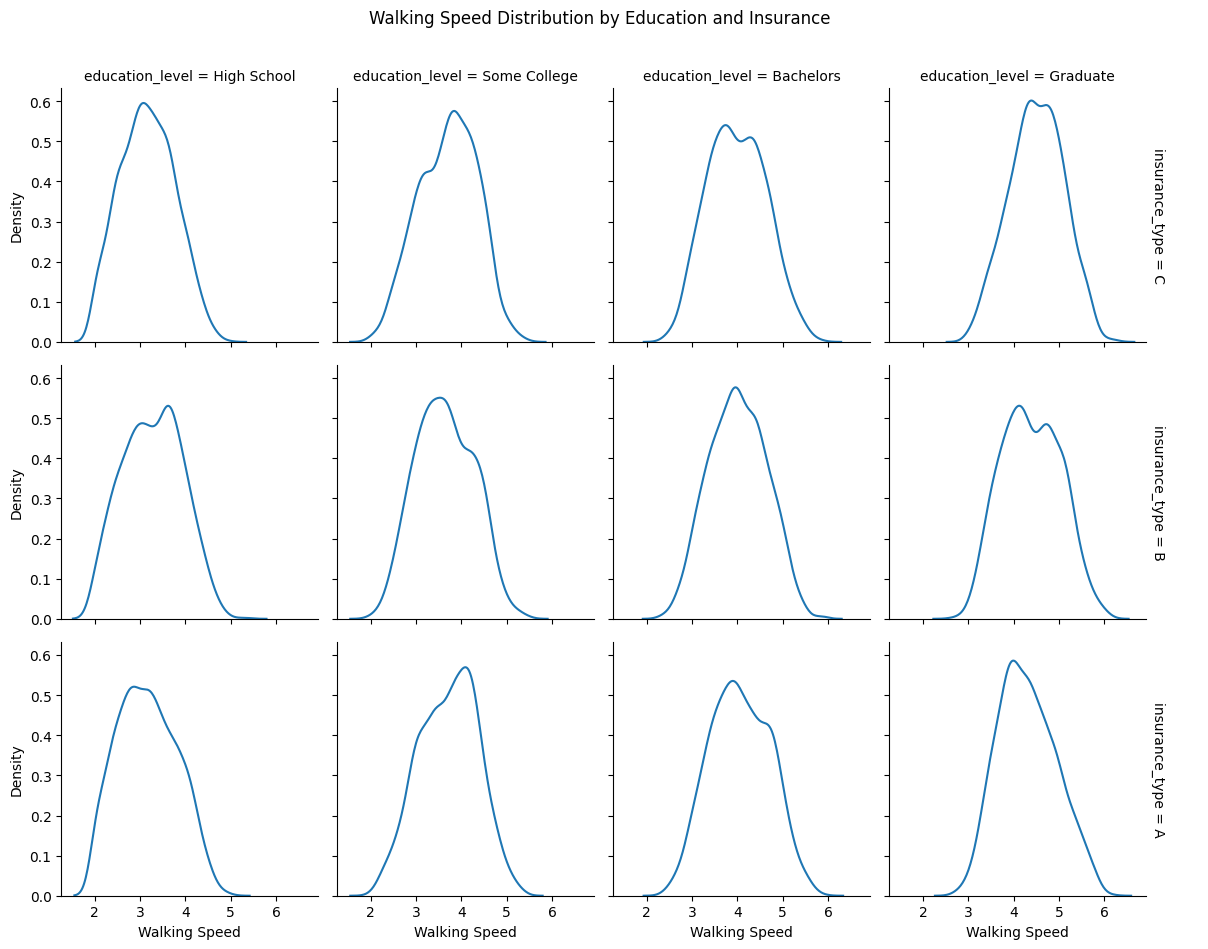

In [13]:
g = sns.FacetGrid(df, col='education_level', row='insurance_type', margin_titles=True)
g.map(sns.kdeplot, 'walking_speed')
g.set_axis_labels('Walking Speed', 'Density')
g.add_legend()
plt.suptitle('Walking Speed Distribution by Education and Insurance', y=1.05)
plt.show()

## Time trends where relevant

In [14]:
# Convert visit_date to datetime
df['visit_date'] = pd.to_datetime(df['visit_date'])
# Create a monthly average walking speed by insurance type
df['month'] = df['visit_date'].dt.month
monthly_data = df.groupby(['month', 'insurance_type'])['walking_speed'].mean().reset_index()

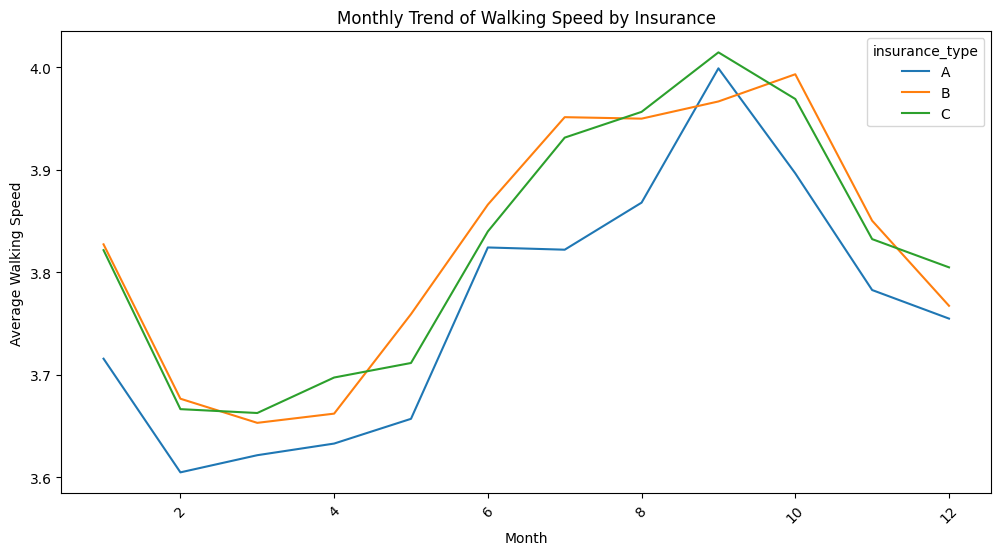

In [15]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='month', y='walking_speed', hue='insurance_type', data=monthly_data)
plt.title('Monthly Trend of Walking Speed by Insurance')
plt.xlabel('Month')
plt.ylabel('Average Walking Speed')
plt.xticks(rotation=45)
plt.show()